<a href="https://colab.research.google.com/github/hydrationn/AI-based-Representation-and-Problem-Solving/blob/main/20240306_1%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from tqdm import tqdm
import pandas as pds
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sbn

import torchvision
import torch

In [ ]:
# 변수: 자료형 구분 없이 저장 가능
a = 10
b = 10.0
c = 'test'
print(a,b,c)
print(type(a), type(b), type(c))

10 10.0 test
<class 'int'> <class 'float'> <class 'str'>


In [ ]:
# list(리스트): 여러 개의 데이터를 담을 수 있는 데이터 구조
a = [10,20,30]
b = ['apple', 'banana']
print(a, type(a))
print(b)

[10, 20, 30] <class 'list'>
['apple', 'banana']


In [ ]:
a = [10,20,30]
b = ['apple', 'banana']
print(a[1:3])
print(a[0:2])

[20, 30]
[10, 20]


In [ ]:
# list 요소 추가
a.append(40)
print(a)

[10, 20, 30, 40]


In [ ]:
# list 정렬
c = [3,6,9,2,1,4,7]
c.sort()
print(c)

[1, 2, 3, 4, 6, 7, 9]


In [ ]:
# list 뒤집기
a = [10,20,30,40]
a.reverse()
print(a)

[40, 30, 20, 10]


In [ ]:
# tuple: 요소의 생성, 삭제, 수정 X
t1 = (1,2,3)
dict1 = {'사과':1, '바나나':2}
print(t1)
print(dict1['사과'])

(1, 2, 3)
1


In [ ]:
# input
val = input('입력해주세요: ')
print('value: {0}, type: {1}'.format(val, type(val)))

입력해주세요: 10
value: 10, type: <class 'str'>


In [ ]:
# print
i, f, s = 3.3, 5, '사과'
print('int:%d, float:%f, string:%s' %(i, f, s))
print('float:{1}, int:{0}, string{2}'.format(i,f,s))
print(type(i), type(f), type(s))

int:3, float:5.000000, string:사과
float:5, int:3.3, string사과
<class 'float'> <class 'int'> <class 'str'>


In [ ]:
# 들여쓰기
# python은 함수나 제어문 등의 범위를 들여쓰기로 구분
# 들여쓰기 정도에 따라서 코드의 속해있는 위치가 달라짐.

In [ ]:
# if 조건문
x = int(input('숫자를 입력하세요: '))
if x > 60:
  print('x는 60보다 큽니다. ')
elif x == 60:
  print('x는 60과 같습니다. ')
else :
  print('x는 60보다 작습니다. ')
print(x)

숫자를 입력하세요: 10
x는 60보다 작습니다. 
10


In [ ]:
# for 반복문
for i in range(3):
  print(i)
print()

for i in range(1,10,20):
  print(i)
print()

a = [3,6,9]
for i in a:
  print(i)
print()

for index, value in enumerate(a):
  print(index, value)

0
1
2

1

3
6
9

0 3
1 6
2 9


In [ ]:
# 함수
# default로 정해놓는 부분은 가장 뒤에서부터 시작해야 한다.
def add2(a,b,c=2):
  return a+b+c

print(add2(3,5))
print(add2(3,5,5))

10
13


In [ ]:
# PyTorch: python 기반 오픈소스 머신러닝 라이브러리
# -> 초기엔 과학 연산 라이브러리였으나, GPU를 이용한 텐서 조작 및 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전

import torch
import torchvision
import torchvision.transforms as transforms

# 데이터 전처리 변환들을 묶어서 사용 -> 이미지를 텐서로 변환
transform = transforms.Compose(
    [transforms.ToTensor()]
)

batch_size = 4

# MNIST 데이터셋 로드 클래스
mnist_trainset = torchvision.datasets.MNIST(root = './data', # 데이터셋 저장 경로 지정
                                            train = False, # 훈련 데이터셋인지, 테스트 데이터셋인지 지정
                                            download = True, # 데이터셋 다운로드 여부 결정
                                            transform = transform) # 이미지를 텐서로 변환

# PyTorch 데이터 로더 클래스
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset,
                                                batch_size = batch_size,
                                                shuffle = False, # 데이터를 섞을지 여부 결정
                                                num_workers = 2) # 데이터 로드 시 사용할 서브 프로세스

mnist_classes = (0,1,2,3,4,5,6,7,8,9)

In [ ]:
# Dataset: 메모리에서 불러온 모델에 공급되는 데이터 집합
# Dataloader: dataset에서 데이터를 원하는 만큼 불러오고 처리하기 위한 유틸리티
#           -> 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만큼 데이터를 가져온다.

# >>>>> Data 준비 과정
# root: 학습/데이터 저장 경로
# train: 학습용 또는 테스트용 데이터셋 여부 결정
# download=True: root에 데이터가 없는 경우 인터넷에서 다운로드
# transform: 입력과 정답(label) 이미지의 변형(transform) 방식 지정

# >>>>> 코드 설명
# Torchvision: 파이토치에서 제공하는 데이터셋들이 모여있는 패키지
# Torchvision.transforms: 데이터셋 이미지 전처리 방식
# Batch_size: 역전파를 한 번 실행할 때 처리할 이미지 수
# Transform.compose: 사용자가 정의한 전처리 함수를 적용하기 위한 객체
# Transforms.ToTenser(): Numpy 타입의 이미지를 텐서 타입으로 변환

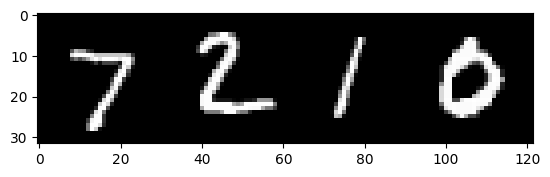

7     2     1     0    
(1, 28, 28)


In [ ]:
def imshow(img): # 이미지 시각화 함수
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(mnist_trainloader) # 이미지와 레이블을 불러온다.
images, labels = next(iter(mnist_trainloader))

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{str(mnist_classes[labels[j]]):5s}'for j in range(batch_size)))
print(images[0].numpy().shape) # 이미지의 형태 출력

In [ ]:
# 여기서부터는 개인 공부

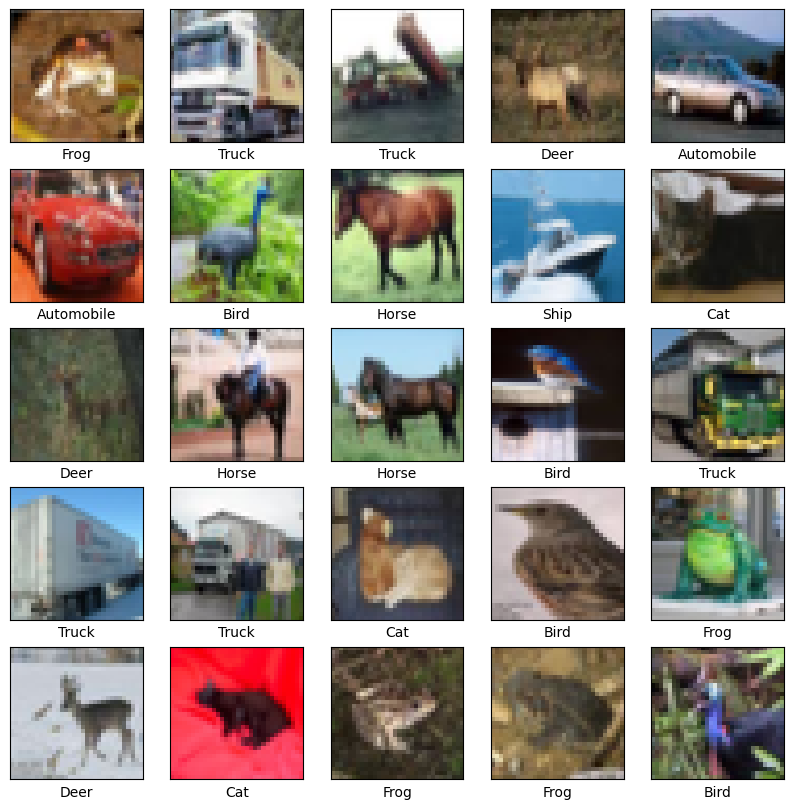

In [ ]:
# 필요한 라이브러리 import
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# CIFAR-10 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 클래스의 이름 지정
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# 데이터 출력
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

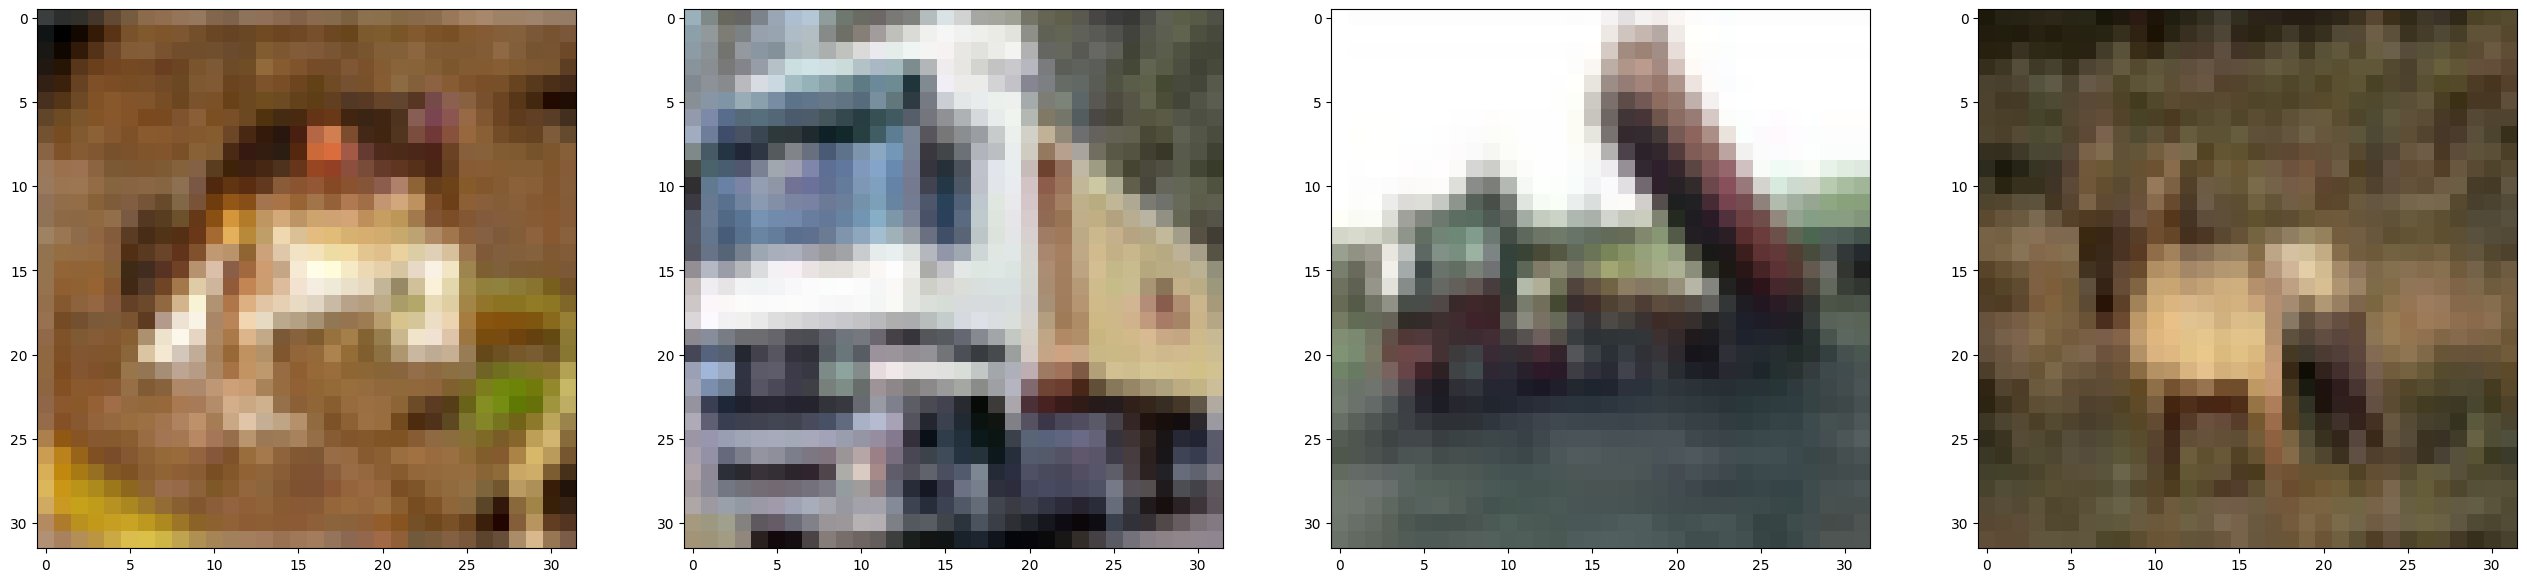

In [ ]:
# 필요한 라이브러리 import
from keras.datasets import cifar10
import matplotlib.pyplot as plt


# CIFAR-10 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 클래스의 이름 지정
class_names = ['Car', 'Ship', 'Dog', 'Bird']

# 데이터 출력
plt.figure(figsize=(32, 32))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

